<a href="https://colab.research.google.com/github/natdebandi/text_mining_unrn/blob/main/use_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de modelos pre-entrenados para clasificación y finetunning


**Natalia Dedandi**


Vamos a usar las librerías y datasets de Hugging face

https://huggingface.co/

Esta notebook parte del modelo ya entrenado por ustedes


In [1]:
!pip install datasets seaborn
! pip install -U accelerate
! pip install -U transformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

Nos conectamos a HUGGINFACE

https://huggingface.co/

In [2]:
from huggingface_hub import notebook_login
from google.colab import userdata

notebook_login()

In [3]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

checkpoint = "natdebandi/beto_ejemplo_clase"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

my_model = AutoModelForSequenceClassification.from_pretrained(checkpoint)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/735k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/710 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [4]:
texto_prueba=["son todos unos boludos"]

In [5]:
import torch

tokens = tokenizer(texto_prueba, padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    outputs = my_model(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)

predictions


tensor([0])

In [6]:
examples = ["hay que matarlos a todos", "Vamos a la plaza a marchar","Los chinos son todos sucios","Culpa de los bolitas"]

In [7]:
for example in examples:
  tokens = tokenizer([example], padding=True, truncation=True, return_tensors="pt")
  with torch.no_grad():
    outputs = my_model(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)

  if predictions[0].item() == 0:
    print(f'"{example}" : NO HATEFUL')
  else:
    print(f'"{example}" : HATEFUL')


"hay que matarlos a todos" : HATEFUL
"Vamos a la plaza a marchar" : NO HATEFUL
"Los chinos son todos sucios" : HATEFUL
"Culpa de los bolitas" : HATEFUL


¿Que pasa si uso el modelo BETO sin finetunning?

In [8]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

checkpoint = "distilbert/distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

model_d = AutoModelForSequenceClassification.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
for example in examples:
  tokens = tokenizer([example], padding=True, truncation=True, return_tensors="pt")
  with torch.no_grad():
    outputs = model_d(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)

  if predictions[0].item() == 0:
    print(f'"{example}" : NO HATEFUL')
  else:
    print(f'"{example}" : HATEFUL')

"hay que matarlos a todos" : HATEFUL
"Vamos a la plaza a marchar" : HATEFUL
"Los chinos son todos sucios" : HATEFUL
"Culpa de los bolitas" : HATEFUL


Prueben otros modelos.. ¿cuales pueden usar?


Teniamos otro conjunto de evaluación en la base original

Podemos tratar de aplicarle el clasificador a este conjunto. Podemos verlo primero


In [10]:
from datasets import load_dataset

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")


README.md:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [11]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [12]:
ds1['dev']

Dataset({
    features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
    num_rows: 9106
})

In [13]:
ds_dev=ds1['dev'].select_columns(["id","text","HATEFUL"])

In [14]:
# Esto es una forma clásica de obtener los % con un group by usando pandas

import pandas as pd

# Assuming 'ds1' and 'ds_dev' are defined as in the provided code.
ds_dev_df = pd.DataFrame(ds_dev)

# Group by 'HATEFUL' and count occurrences
hateful_counts = ds_dev_df.groupby('HATEFUL')['id'].count()
hateful_counts


,id
HATEFUL,
0,7719
1,1387


In [15]:
# Calculate percentages
total_count = len(ds_dev_df)
hateful_percentages = (hateful_counts / total_count) * 100

hateful_percentages

,id
HATEFUL,
0,84.768285
1,15.231715


In [16]:
#tomo una muestra para que no demore tanto
import random

# Set the random seed for reproducibility
random.seed(14)

# Sample 500 random examples from ds_dev
indices_to_sample = random.sample(range(len(ds_dev)), 1000)
ds_dev_sampled = ds_dev.select(indices_to_sample)

ds_dev_sampled


Dataset({
    features: ['id', 'text', 'HATEFUL'],
    num_rows: 1000
})

Cuento cuantos y el % para ver si está bien

In [17]:
# Assuming 'ds1' and 'ds_dev' are defined as in the provided code.
ds_dev_df = pd.DataFrame(ds_dev_sampled)

# Group by 'HATEFUL' and count occurrences
hateful_counts = ds_dev_df.groupby('HATEFUL')['id'].count()
total_count = len(ds_dev_df)
hateful_percentages = (hateful_counts / total_count) * 100

hateful_percentages


,id
HATEFUL,
0,85.2
1,14.8


In [18]:
# Assuming 'ds_dev' is defined as in the provided code.
ds_dev_df = pd.DataFrame(ds_dev_sampled)

# Find the first example with HATEFUL = 1
hateful_example = ds_dev_df[ds_dev_df['HATEFUL'] == 1].iloc[0]

hateful_example["text"]


'@usuario Bala y a la bolsa. Estas lacras no se recuperan nunca mas!!!'

In [19]:
ds_dev_sampled[967]

{'id': 407976,
 'text': '@usuario Es que sos incogible..quien te va a hacer un hijo.....algun ciegoooo',
 'HATEFUL': 1}

Aplico el modelo al conjunto

In [20]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

checkpoint = "natdebandi/beto_ejemplo_clase"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

my_model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [22]:
from tqdm.auto import tqdm
from collections import Counter

In [23]:
#se aplica a cada del sample caso el modelo y se guarda otra columna

hateful_t = []
for i in tqdm(range(len(ds_dev_sampled))):
  text = ds_dev_sampled[i]['text']
  tokens = tokenizer([text], padding=True, truncation=True, return_tensors="pt")
  with torch.no_grad():
    outputs = my_model(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)
  hateful_t.append(predictions[0].item())




  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
len(hateful_t)


1000

In [25]:
ds_dev_sampled = ds_dev_sampled.add_column("hateful_t", hateful_t)
ds_dev_sampled

Flattening the indices:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'text', 'HATEFUL', 'hateful_t'],
    num_rows: 1000
})

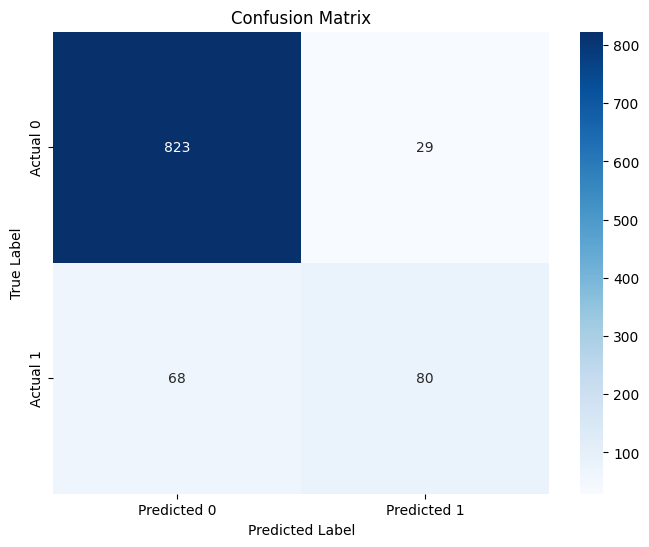

In [26]:
# prompt: calcular la matriz de confusion usando hateful y hateful_t

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ds_dev_sampled' and 'hateful_t' are defined as in the previous code.

# Extract true labels and predicted labels
y_true = ds_dev_sampled['HATEFUL']
y_pred = ds_dev_sampled['hateful_t']

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Extract true labels and predicted labels
y_true = ds_dev_sampled['HATEFUL']
y_pred = ds_dev_sampled['hateful_t']

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.903
Precision: 0.7339449541284404
Recall: 0.5405405405405406
F1 Score: 0.622568093385214
